<a href="https://www.kaggle.com/kalilurrahman/disney-content-eda-analysis?scriptVersionId=89689682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv


In [2]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

![Disney + ](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Disney%2B_logo.svg/512px-Disney%2B_logo.svg.png)
[![disney-plus-mobile-app](https://i.postimg.cc/RFN0G3S8/disney-plus-mobile-app.png)](https://postimg.cc/MMJxppjb)
## Disney+ is an over-the-top subscription video on-demand service owned and operated by Disney Media and Entertainment Distribution, that first launched in the United States on November 12, 2019, later expanding to other territories. 
### Its original series are created and produced by Disney-owned brands such as ***20th Century Studios, Touchstone Pictures, Pixar, Marvel Studios, Lucasfilm and National Geographic***.

###### Inspiration Credit: [Josh's Data Viz on NetFlix](https://www.kaggle.com/joshuaswords/netflix-data-visualization)  

In [3]:
df = pd.read_csv('../input/disney-movies-and-tv-shows/disney_plus_titles.csv')

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [4]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


- 5 columns have missing values, with Director missing 1/3 of the time

In [6]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [7]:
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [8]:
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

# Dealing with the missing data


    

In [9]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
season          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1444 non-null   object        
 1   type          1444 non-null   object        
 2   title         1444 non-null   object        
 3   director      1444 non-null   object        
 4   cast          1444 non-null   object        
 5   country       1444 non-null   object        
 6   date_added    1444 non-null   datetime64[ns]
 7   release_year  1444 non-null   int64         
 8   rating        1444 non-null   object        
 9   duration      1444 non-null   int64         
 10  listed_in     1444 non-null   object        
 11  description   1444 non-null   object        
 12  season        1444 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 157.9+ KB


# Missing values dealt with, but the date isn't quite right yet...

In [12]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,11,November,2021


# Okay, let's visualize

### Build a Pallette using Disney Color 

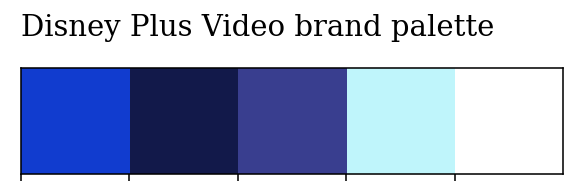

In [13]:
# Palette
sns.palplot(['#113CCF', '#12194A', '#393E8F','#BFF5FB','#FFFFFF'])


plt.title("Disney Plus Video brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# Disney Plus through the years

Disney Plus started as DVD rentals, and now they have an audience of over 150m people - this is their story...

Timeline code from Subin An's awesome notebook
https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

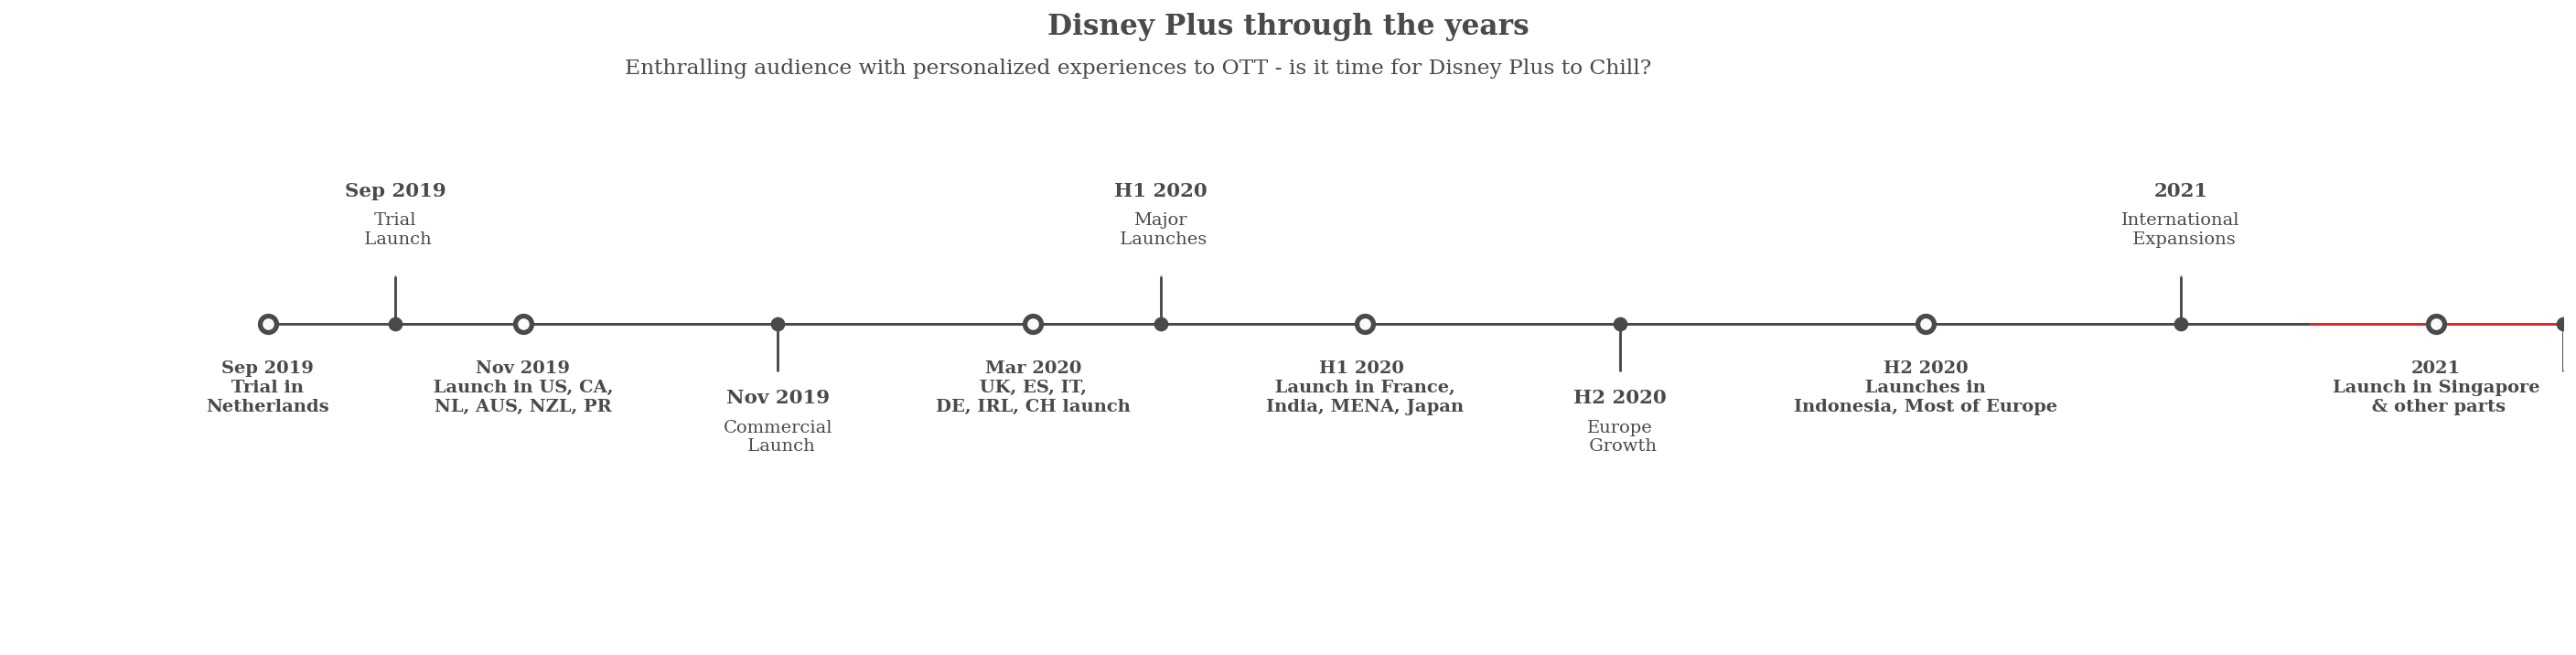

In [14]:
# Timeline code from Subin An's awesome notebook
# https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

from datetime import datetime

## these go on the numbers below
tl_dates = [
    "Sep 2019\n Trial in \nNetherlands",
    "Nov 2019\n Launch in US, CA, \nNL, AUS, NZL, PR",
    "Mar 2020\n UK, ES, IT, \nDE, IRL, CH launch",
    "H1 2020 \n Launch in France, \nIndia, MENA, Japan",
    "H2 2020\n Launches in \nIndonesia, Most of Europe",
    "2021\nLaunch in Singapore\n & other parts"
]

tl_x = [1, 2, 4, 5.3, 7.5, 9.5]

## these go on the numbers
tl_sub_x = [1.5, 3, 4.5, 6.3, 8.5, 10]


tl_sub_times = [
    "Sep 2019","Nov 2019","H1 2020","H2 2020","2021"
]

tl_text = [
    "Trial\n Launch",
    "Commercial\n Launch","Major\n Launches","Europe\n Growth","International\n Expansions"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=10)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#00A8E1', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#00A8E1')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Disney Plus through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"Enthralling audience with personalized experiences to OTT - is it time for Disney Plus to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

# Content - Let's explore

Now we've seen how Disney Plus came to dominate our TV screens, let's have a look at the content they offer...

In [15]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T


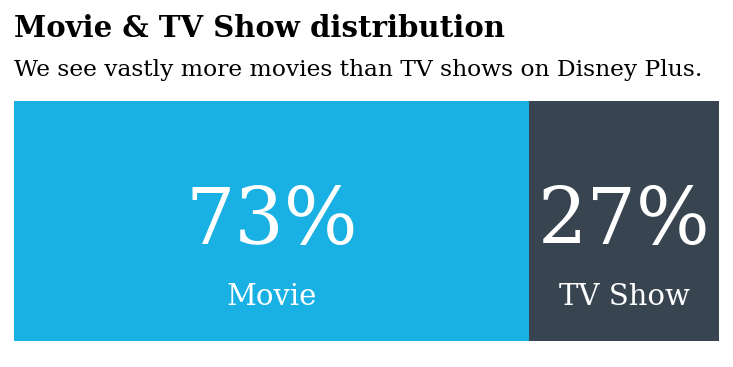

In [16]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#00A8E1', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#232F3E', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Disney Plus.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [17]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#00A8E1", "#232F3E"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [18]:
df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
show_id,1444,1444,s1,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1444,2,Movie,1051,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1444,1444,Duck the Halls: A Mickey Mouse Christmas Special,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,1444,610,No Data,468,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,1444,1189,No Data,189,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1444,89,United States,1219,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,1444,166,2019-11-12 00:00:00,722,2019-10-01,2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,1444.0,NaN,NaN,NaN,NaT,NaT,2003.036011,21.886435,1928.0,1999.0,2011.0,2018.0,2021.0
rating,1444,9,TV-G,318,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1444.0,NaN,NaN,NaN,NaT,NaT,52.352493,47.176624,0.0,0.0,47.0,93.0,183.0


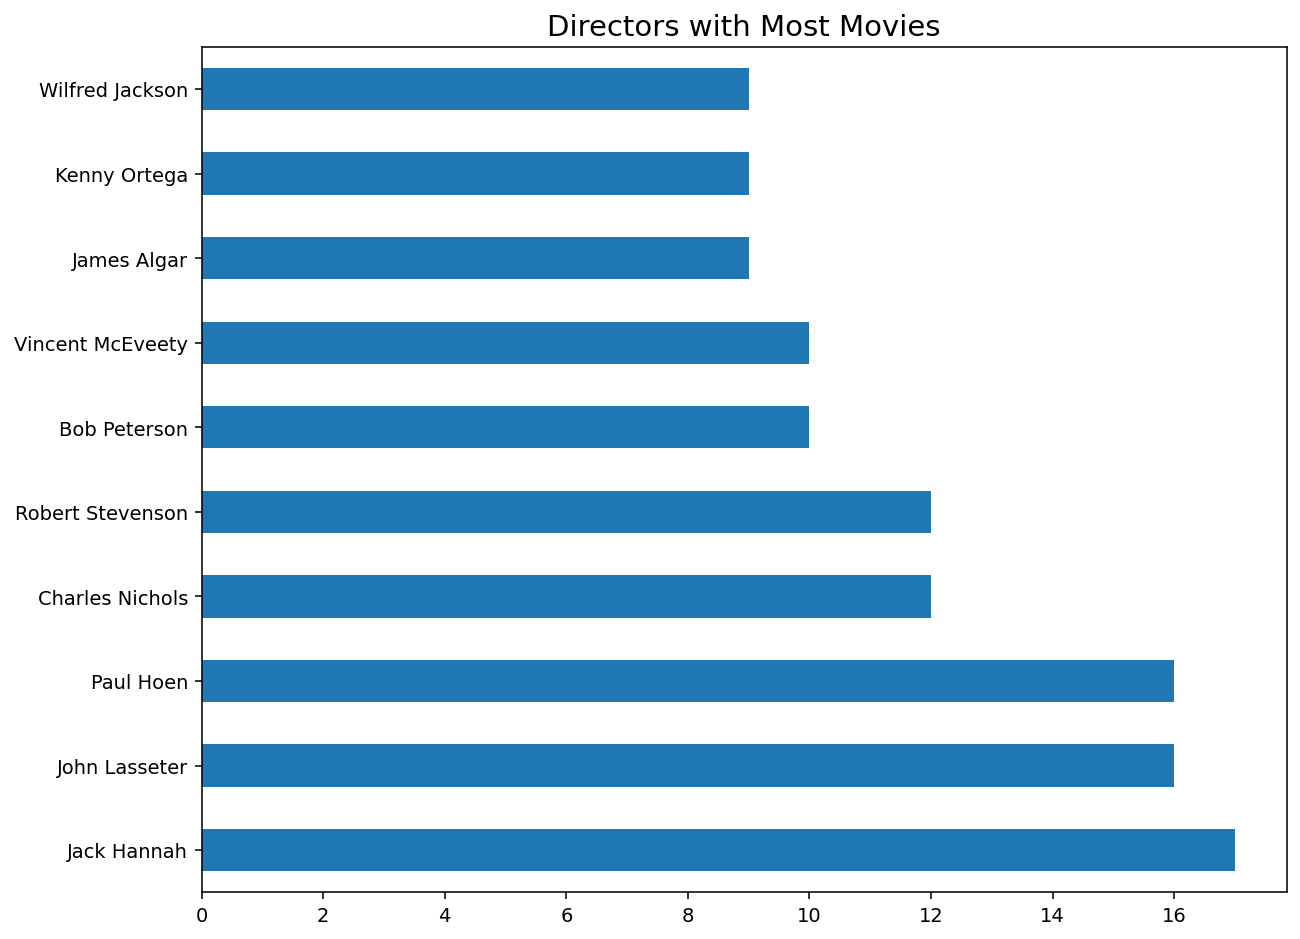

In [19]:
plt.figure(figsize=(10,8))
# Drop 'No Data' row
df2 = df["director"].value_counts().head(11)
df2.tail(10).plot(kind='barh')
plt.title("Directors with Most Movies", size=15)
plt.show()


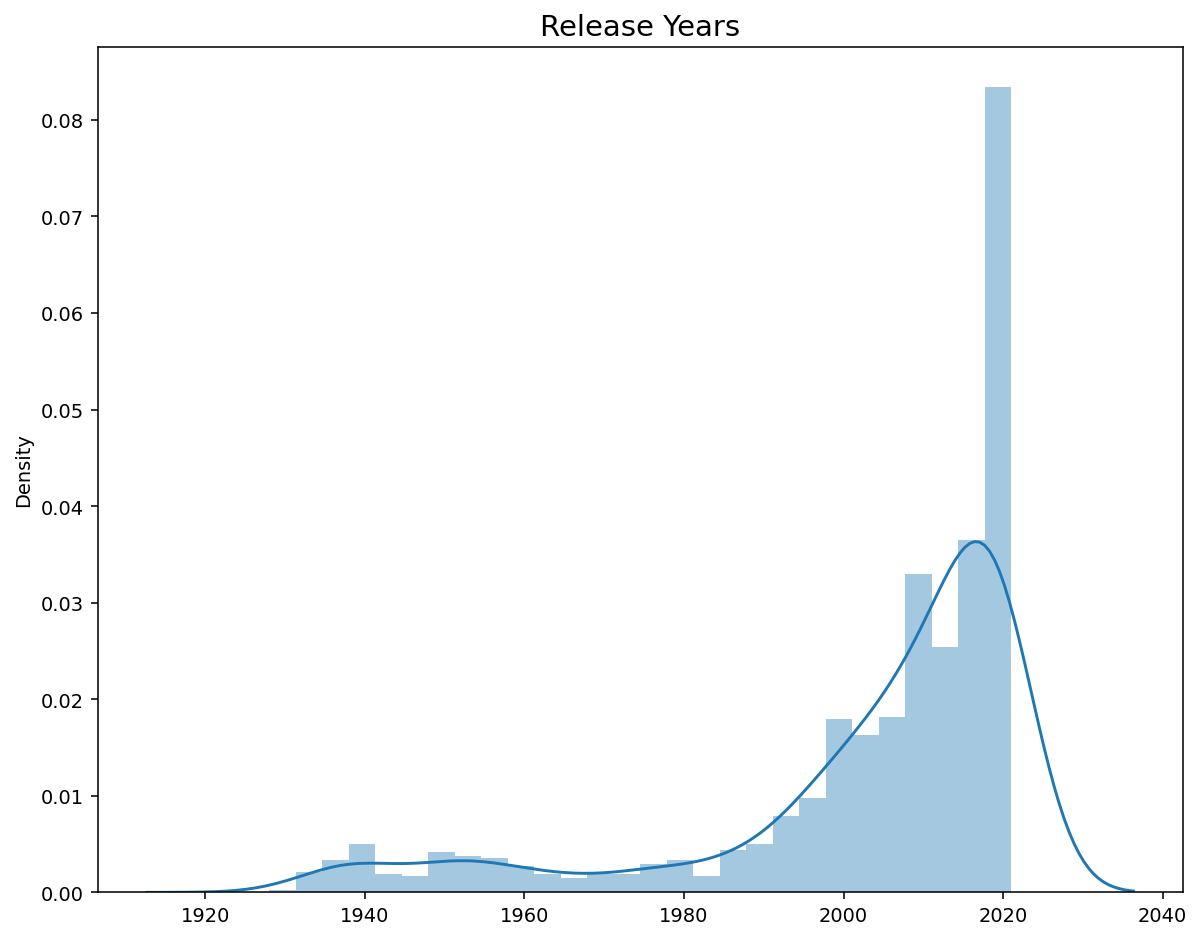

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(x=df["release_year"])
plt.title("Release Years", size=15)
plt.show()

In [21]:
# Code from https://www.kaggle.com/molomunyansanga/disney-and-netflix-comparative-analysis 
#function that parses column values
def parse_column(column):
    column = column.str.split(',')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df

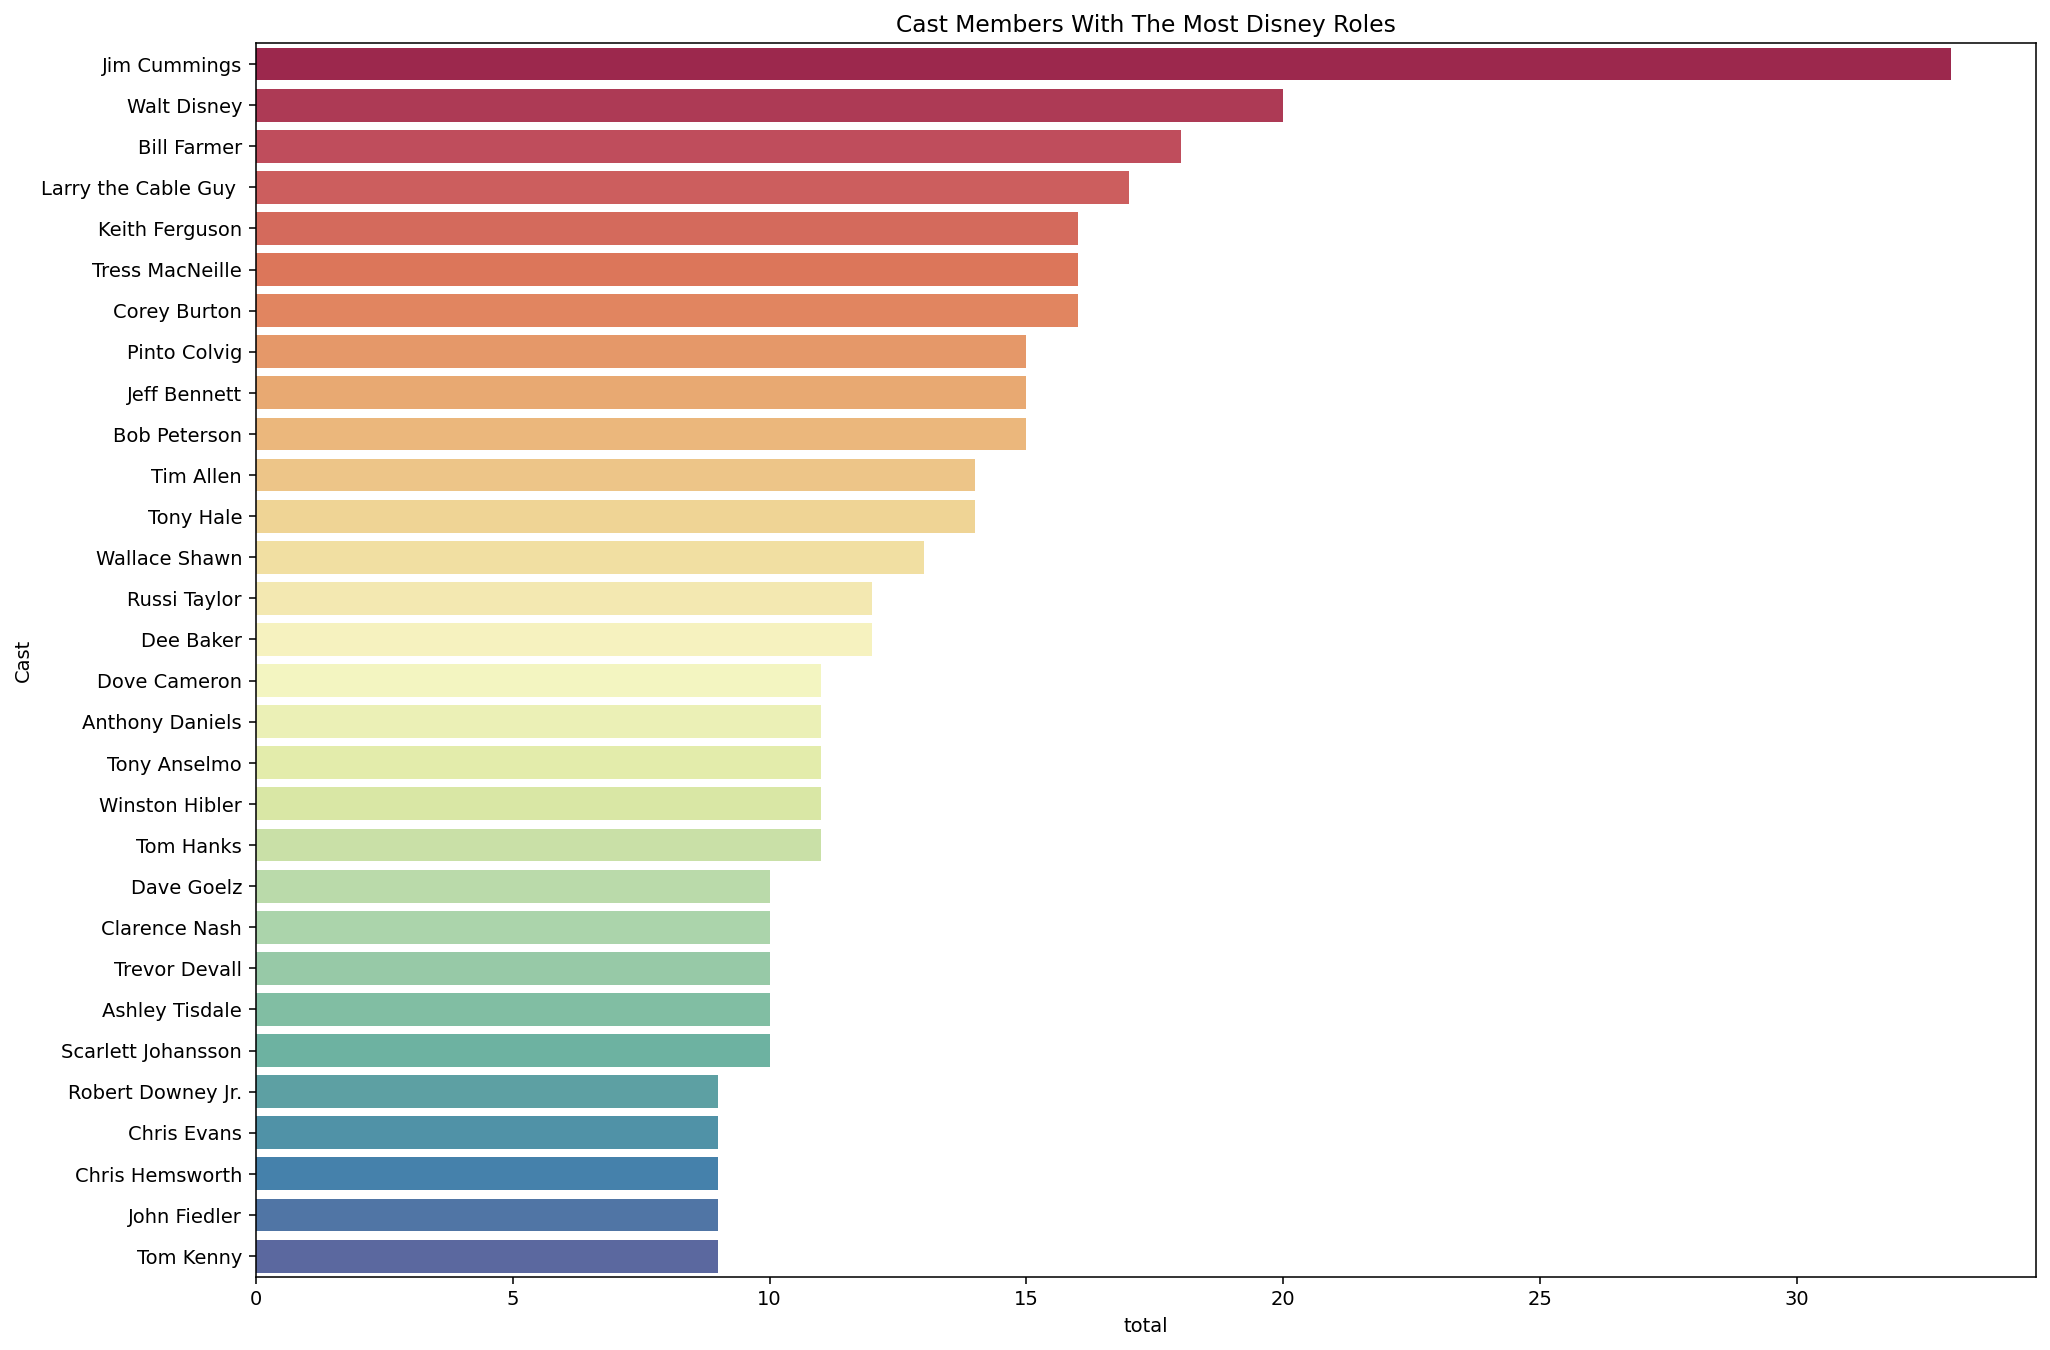

In [22]:
mask = df['cast'].notnull()
disney_castdf = df['cast'][mask]
disney_cast = parse_column(disney_castdf)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.set_title('Cast Members With The Most Disney Roles')
bar2 = sns.barplot(x='total', y='cast', data=disney_cast[1:31], ax=axes, palette='Spectral')
bar2.set(ylabel='Cast')

plt.tight_layout(pad=2);

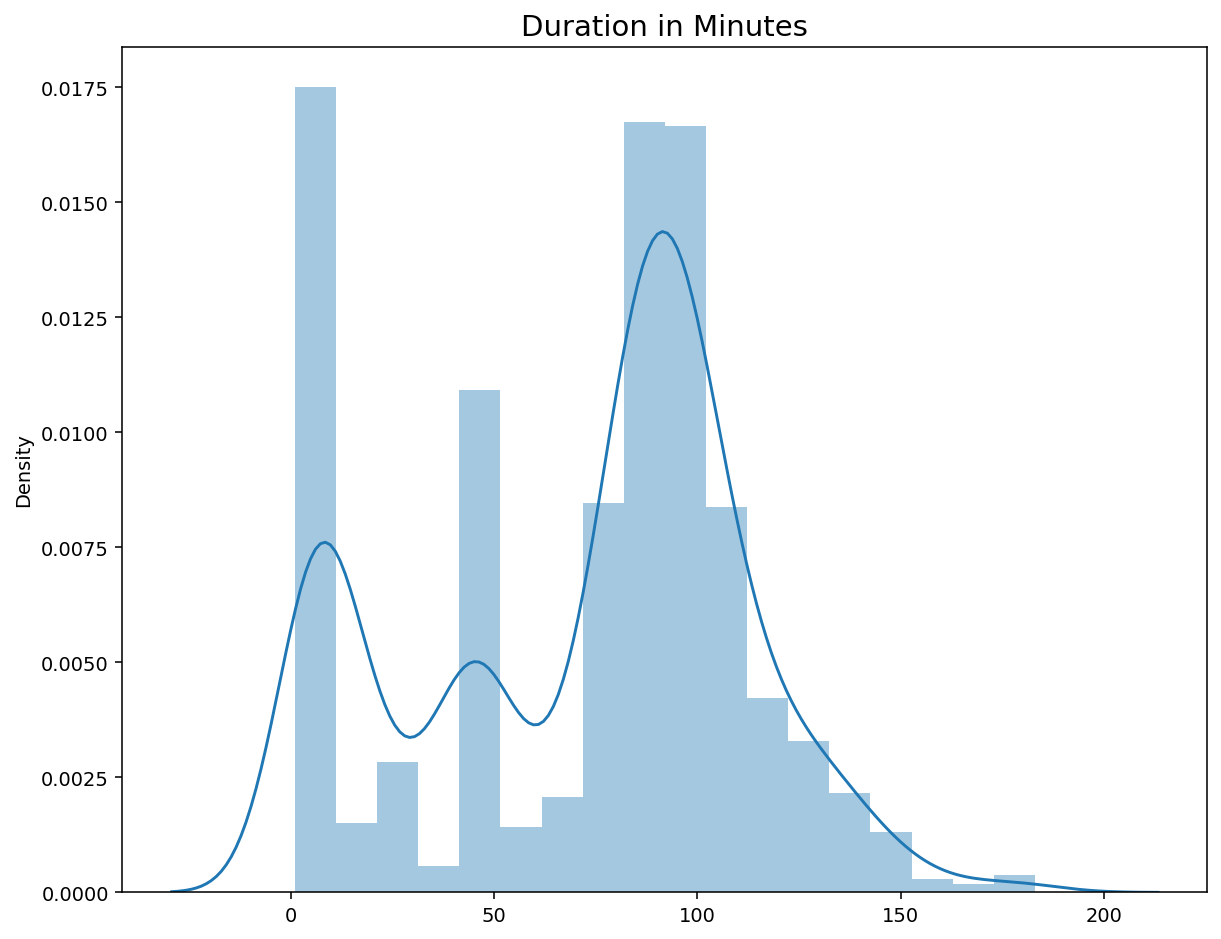

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(x=df[df["duration"]>0]["duration"])
plt.title("Duration in Minutes", size=15)
plt.show()

# By Country

So we now know there are much more movies than TV shows on Disney Plus (which surprises me!).

What about if we look at content by country? 

I would imagine that the USA will have the most content. I wonder how my country, the UK, will compare?

In [24]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

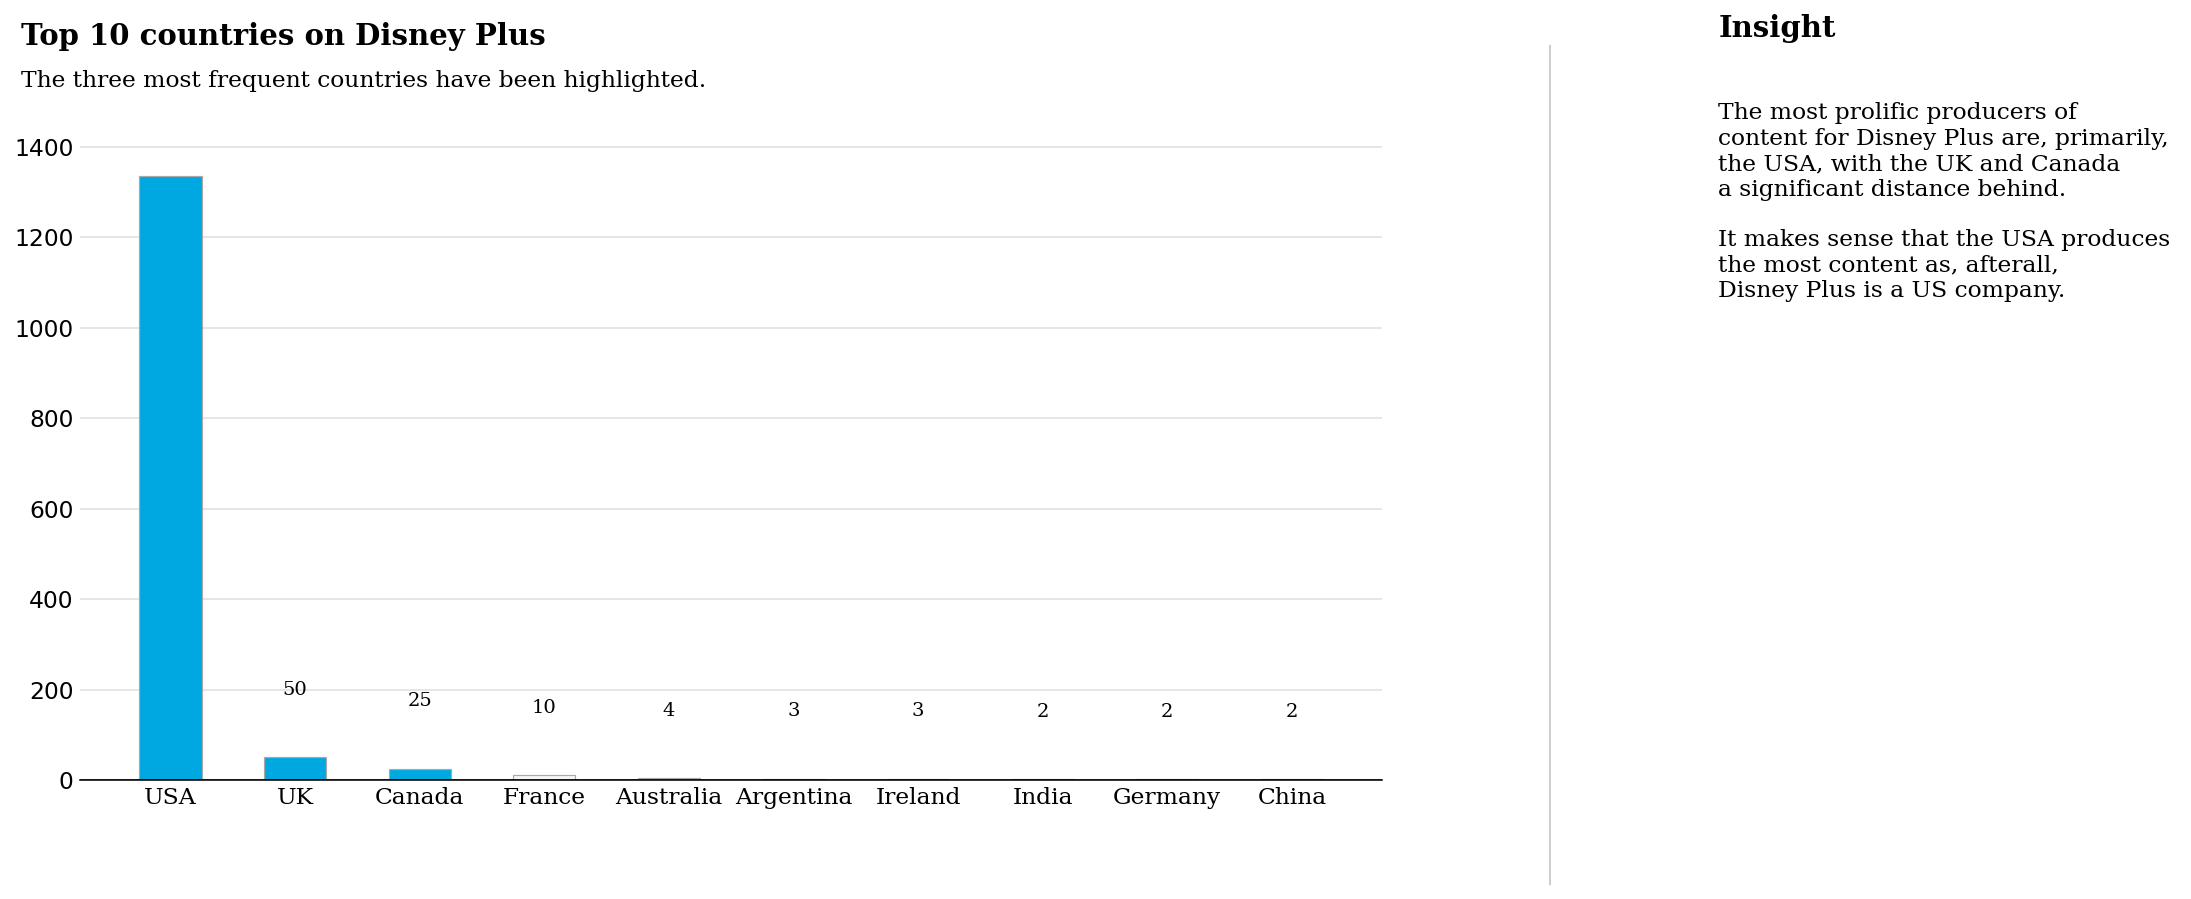

In [25]:


data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#00A8E1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Disney Plus', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Disney Plus are, primarily,
the USA, with the UK and Canada
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Disney Plus is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1600, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


As predicted, the USA dominates. 

The UK is a top contender too, but still some way behind India.

How does content by country vary? 

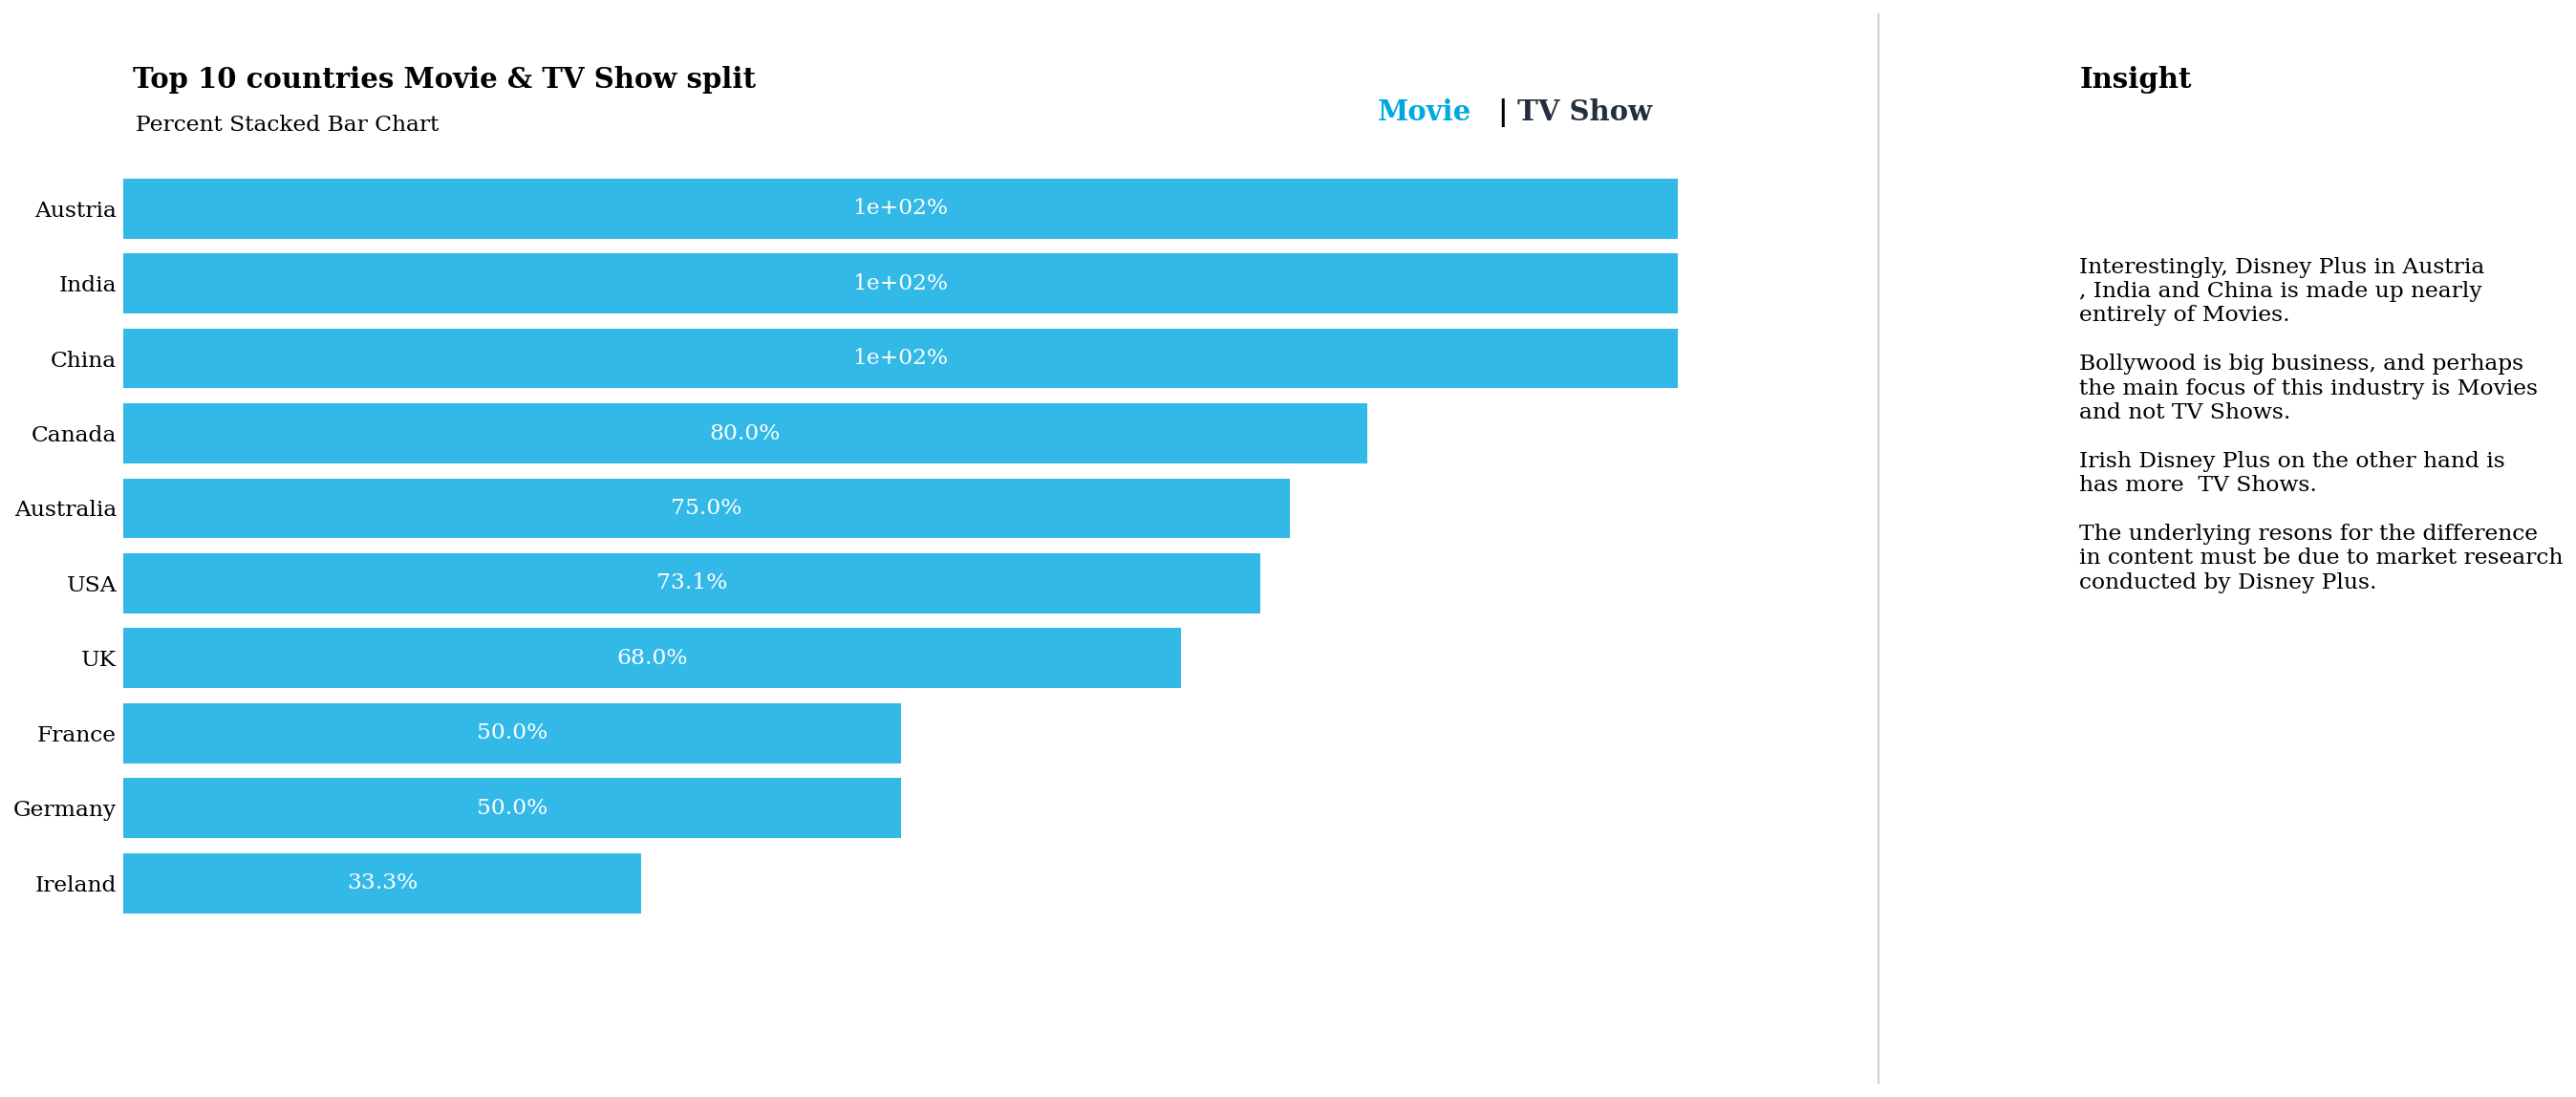

In [26]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#00A8E1', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#232F3E', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Disney Plus in Austria
, India and China is made up nearly 
entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

Irish Disney Plus on the other hand is 
has more  TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Disney Plus.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

As I've noted in the insights on the plot, it is really interesting to see how the split of TV Shows and Movies varies by country.

Ireland is dominated by TV Shows - why is this? I am a huge fan of South Korean cinema so I know they have a great movie selection.

Equally, India is dominated by Movies. I think this might be due to Bollywood - comment below if you have any other ideas!

# Ratings

Let's briefly check out how ratings are distributed

In [27]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

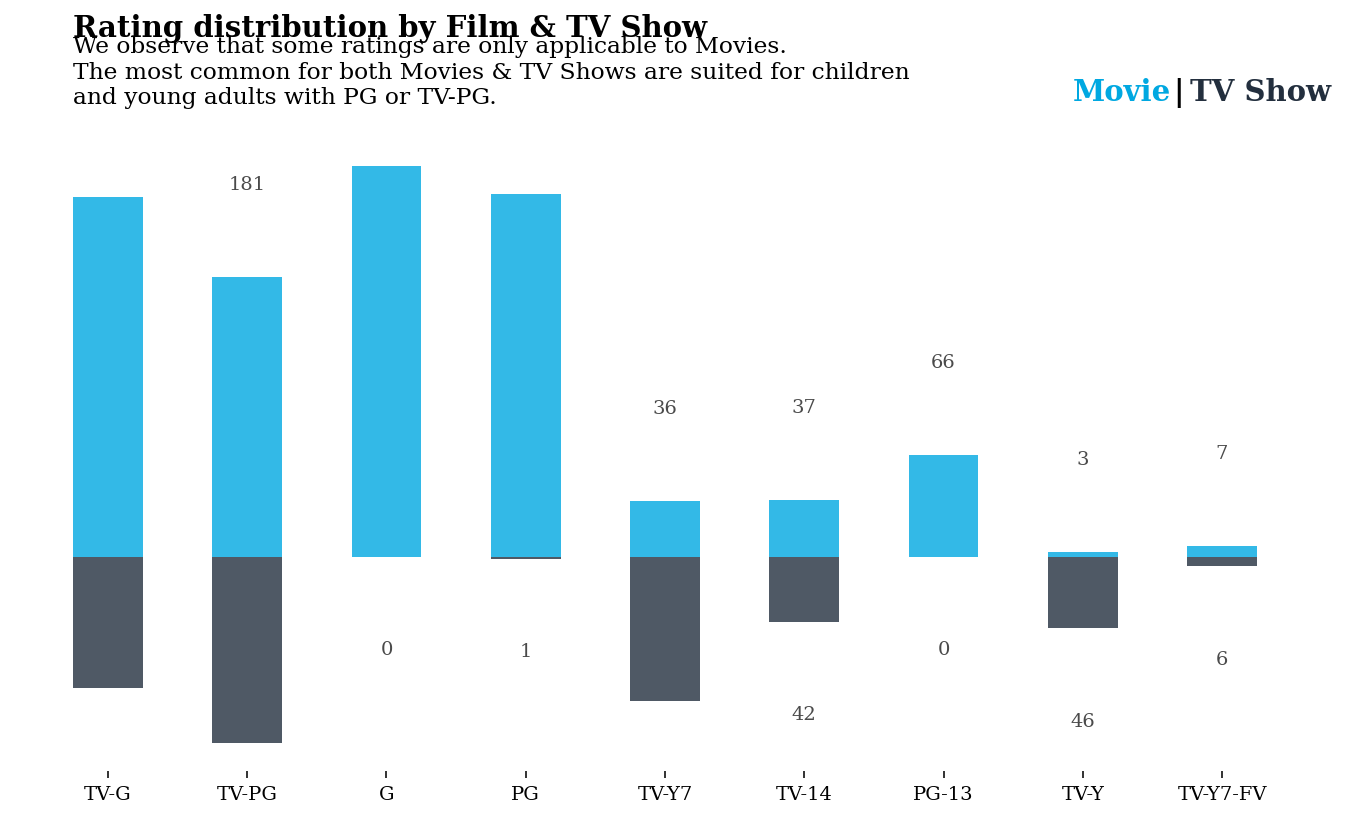

In [28]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#00A8E1', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#232F3E', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are suited for children
and young adults with PG or TV-PG.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')

plt.show()

# How has content been added over the years?

As we saw in the timeline at the start of this analysis, Disney Plus went global in 2016 - and it is extremely noticeable in this plot.

The increase is Movie content is remarkable.

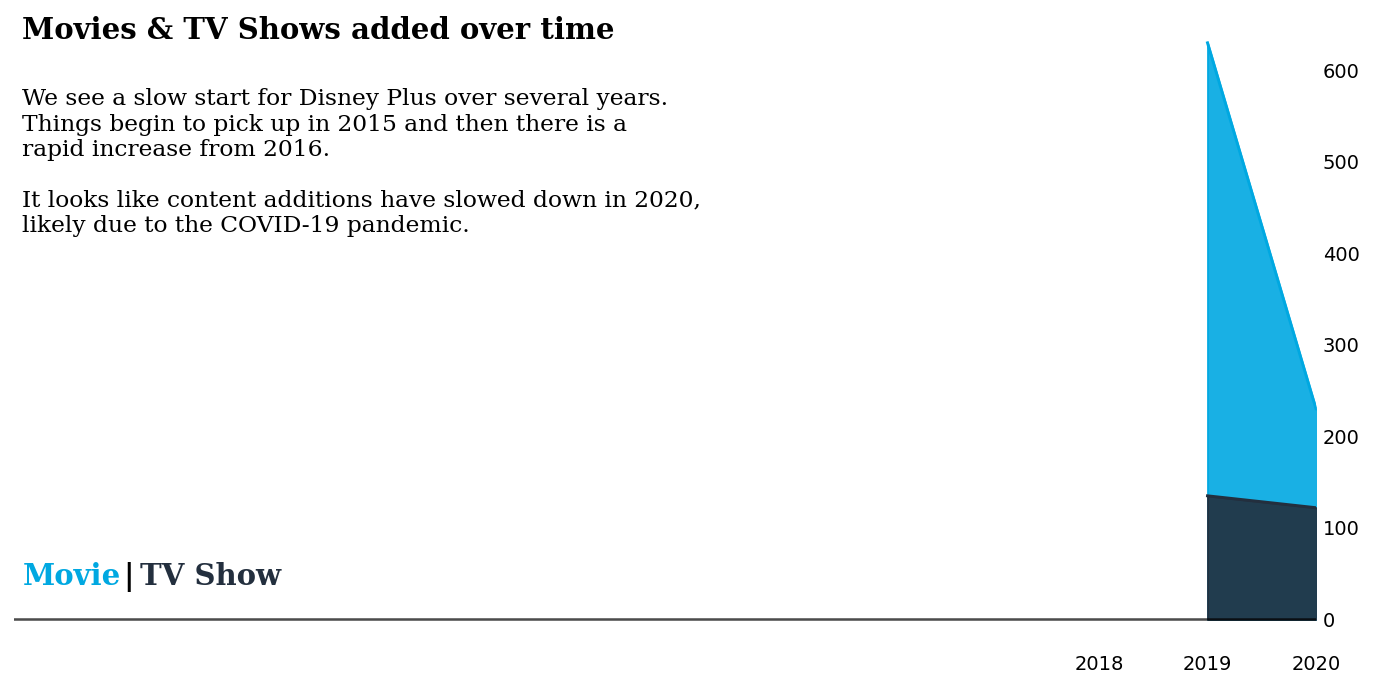

In [29]:


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2018, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Disney Plus over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# We can view the same plot, but as a cumulative total...

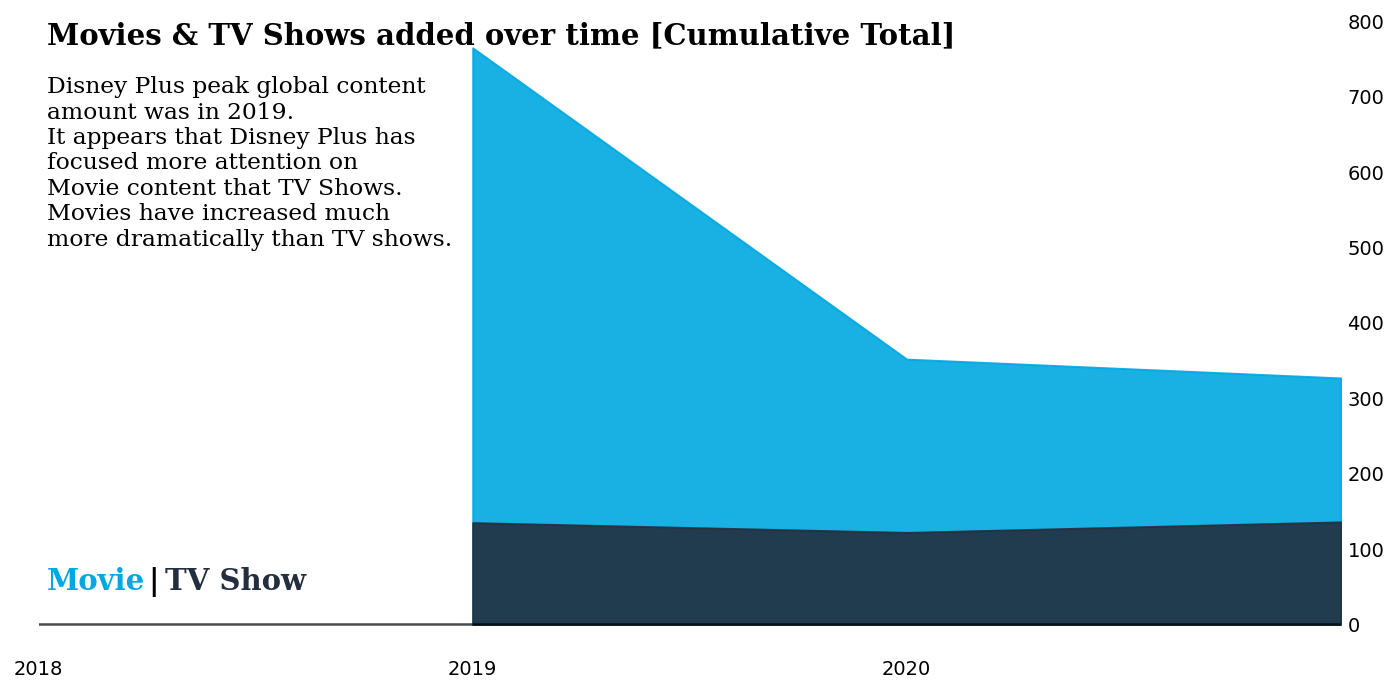

In [30]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2018,2021)
plt.xticks(np.arange(2018, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Disney Plus peak global content 
amount was in 2019.
It appears that Disney Plus has 
focused more attention on  
Movie content that TV Shows. 
Movies have increased much 
more dramatically than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

# Month-by-Month

We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

I'll show this in a couple of ways - a cumulative year view, and also as a radial plot...

In [31]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

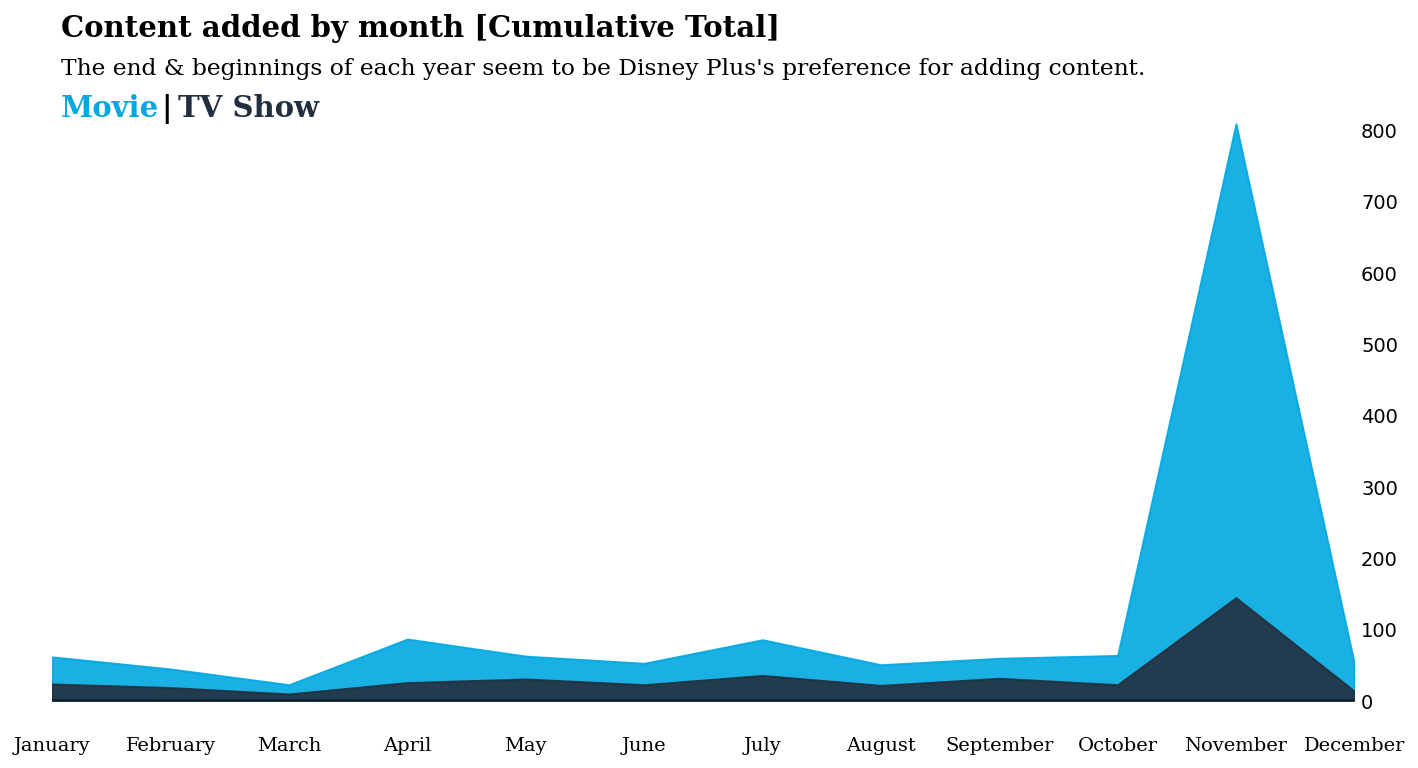

In [32]:


data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Disney Plus's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# What about a more interesting way to view how content is added across the year?

Sometimes visualizations should be eye-catching & attention grabbing - I think this visual acheives that, even if it isn't the most precise.

By highlighting certain months, the reader's eye is drawn exactly where we want it. 

In [33]:
#data_sub2.head()

Yes, December & January are definitely the best months for new content. Maybe Disney Plus knows that people have a lot of time off from work over this period and that it is a good time to reel people in?

February is the worst - why might this be? Ideas welcomed!

# Movie Genres

Let's now explore movie genres a little...

In [34]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Disney Plus palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#232F3E', '#00A8E1','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 36 types in the Disney Plus Movie Dataset


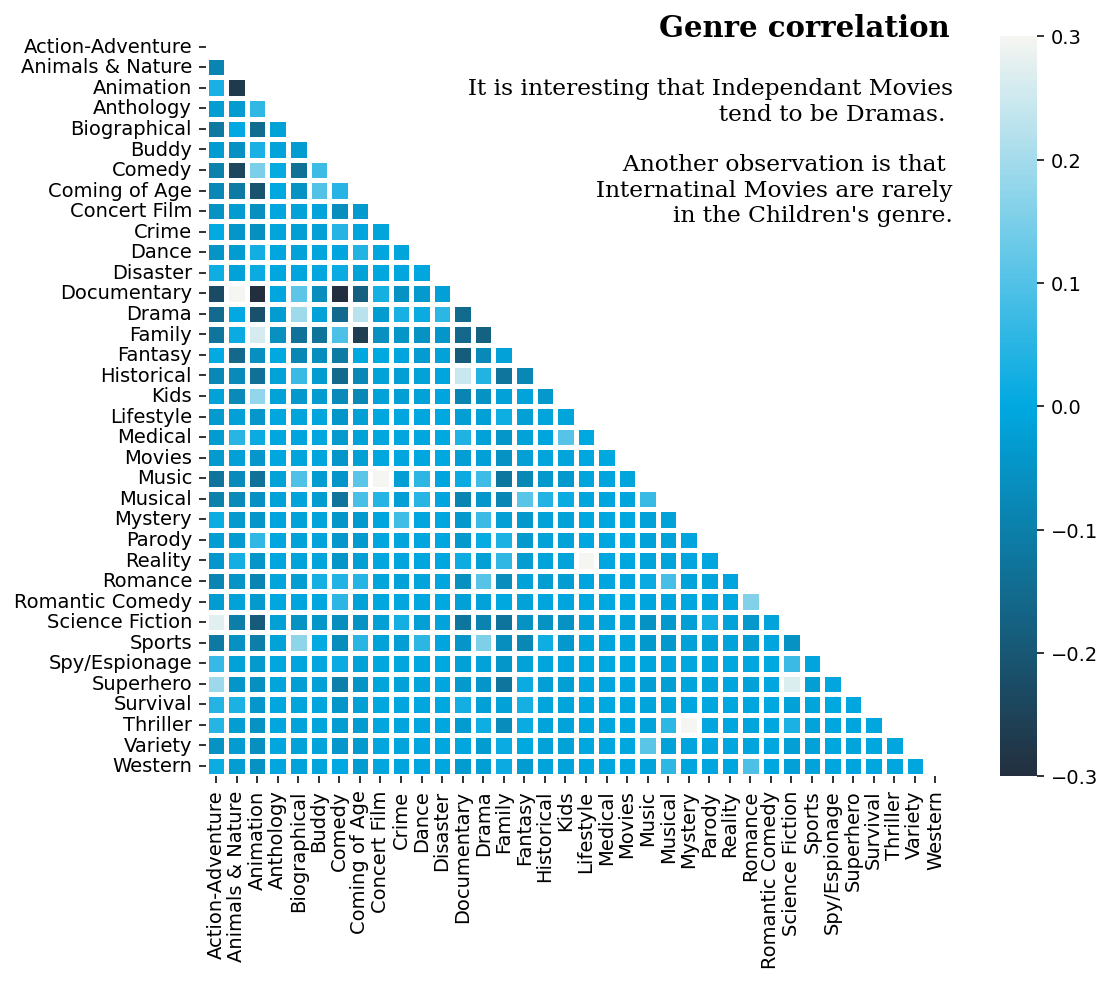

In [35]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

In [36]:


data = df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = df.loc[df['first_country'].isin(data)]

In [37]:
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T



# Target Ages

Does Disney Plus uniformly target certain demographics? Or does this vary by country?



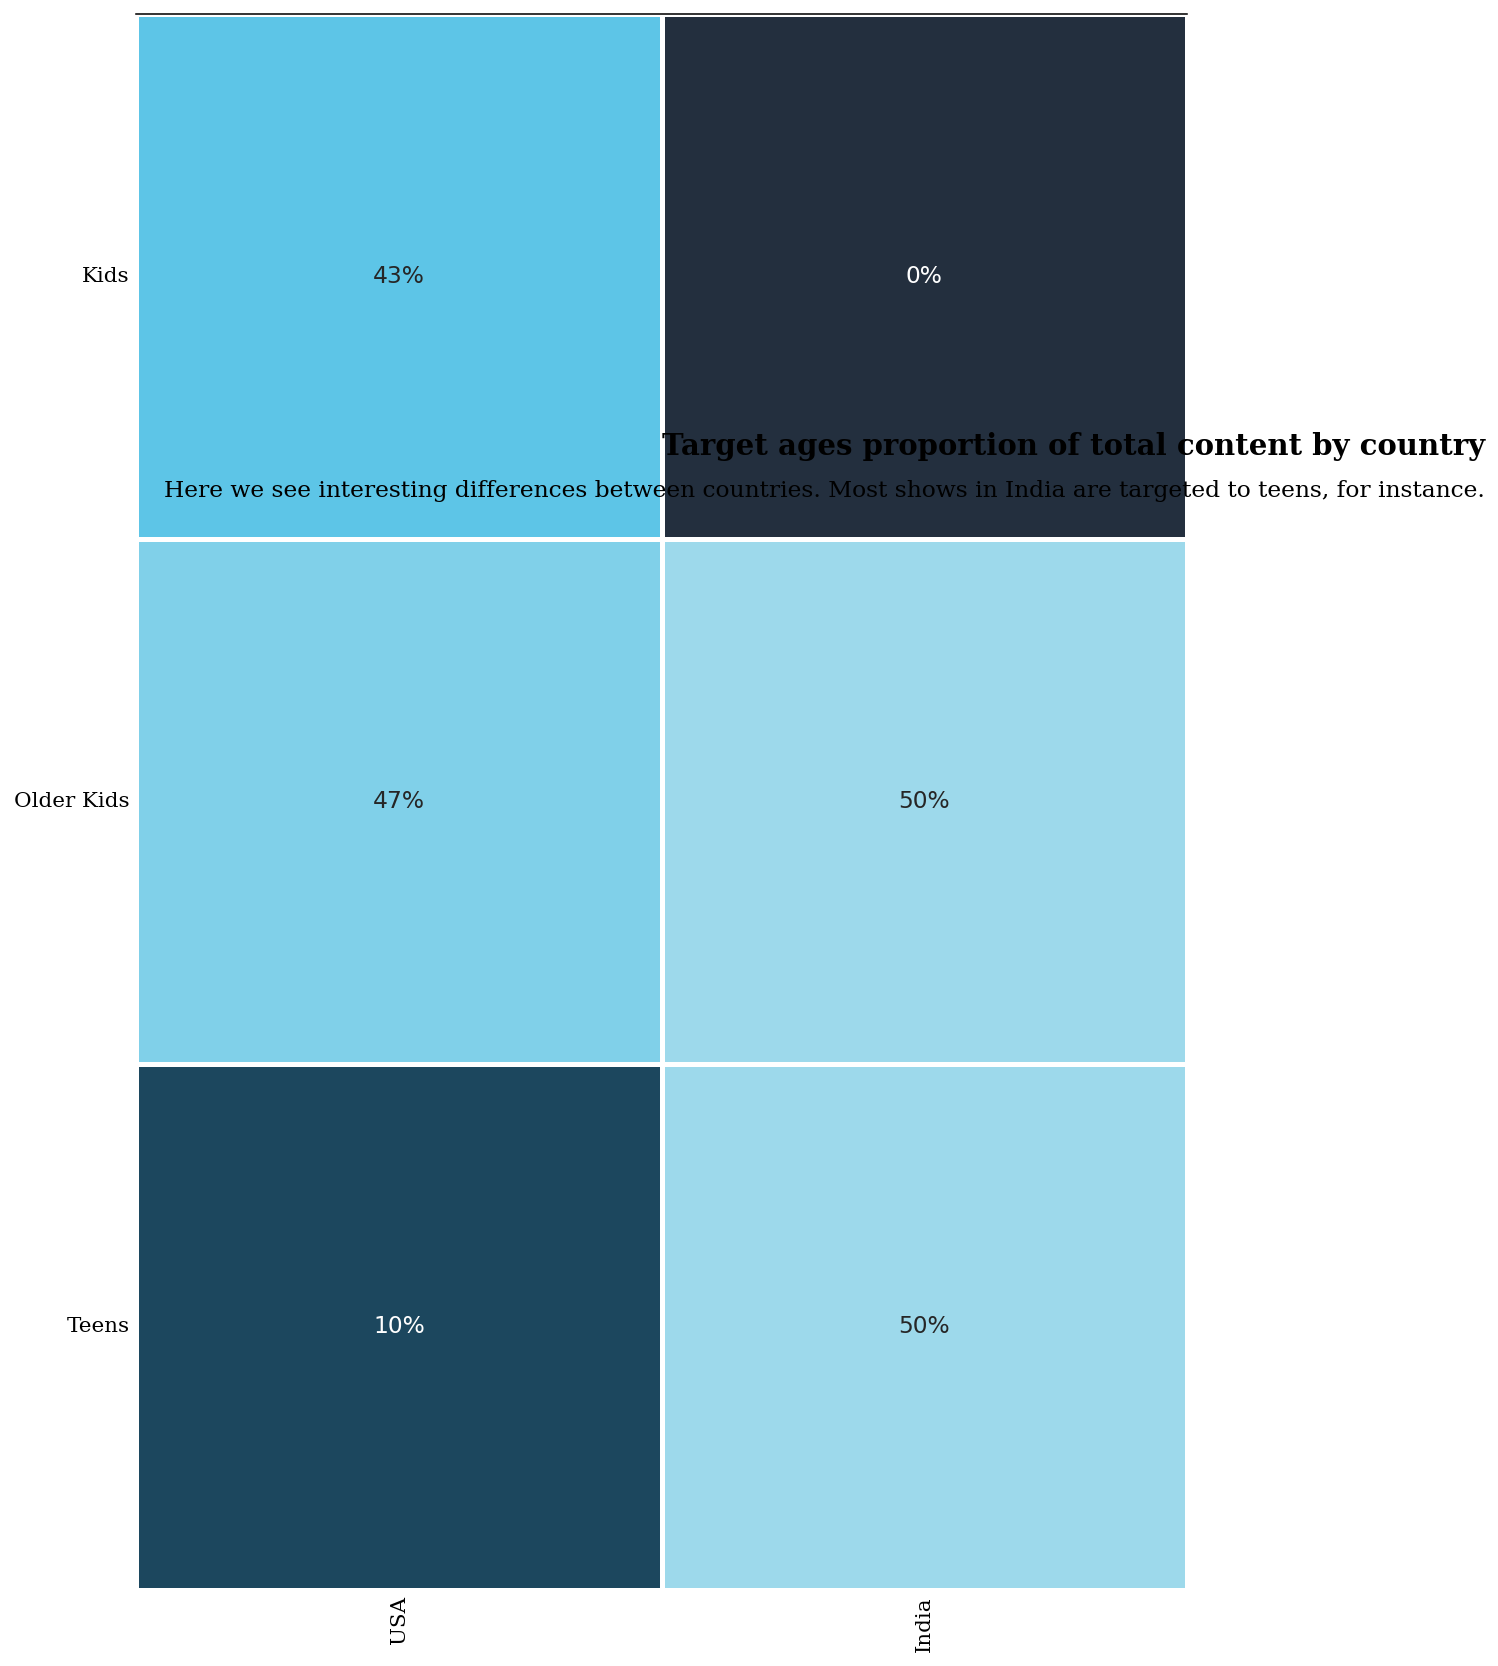

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India',]

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Very interesting results. 

It is also interesting to note similarities between culturally similar countries - the US & UK are closey aligned with their Disney Plus target ages, yet vastly different to say, India or Japan!

# Let's have a quick look at the lag between when content is released and when it is added on Disney Plus

Spain looks to have a lot of new content. Great for them!

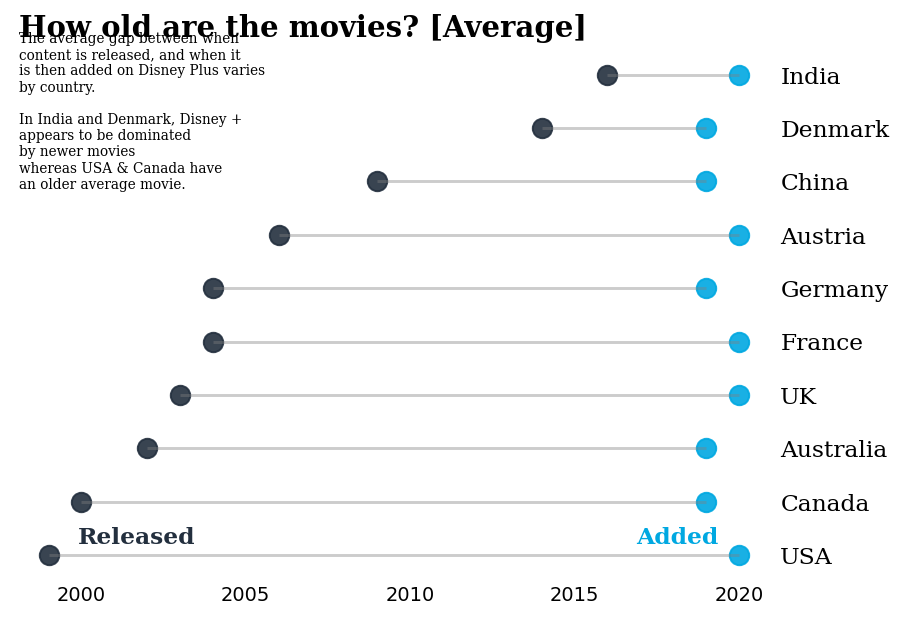

In [39]:
# Data

df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#232F3E')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#00A8E1')


fig.text(0.13, 0.66, 
'''The average gap between when 
content is released, and when it
is then added on Disney Plus varies
by country. 

In India and Denmark, Disney + 
appears to be dominated 
by newer movies 
whereas USA & Canada have
an older average movie.
'''

, fontsize=7, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

What about TV shows...

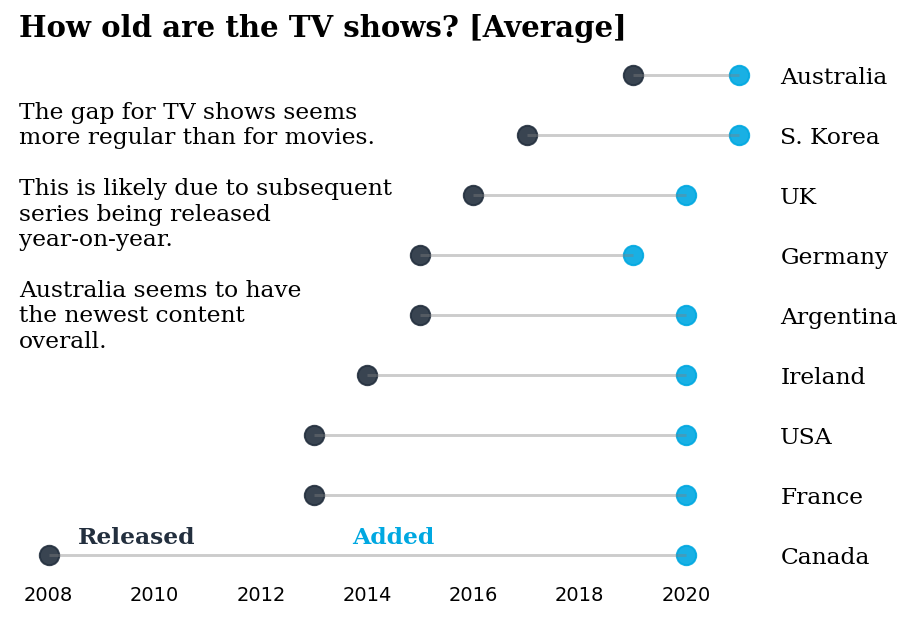

In [40]:
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#232F3E')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#00A8E1')


fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Australia seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()

In [41]:

us_ind = df[(df['first_country'] == 'UK') | (df['first_country'] == 'Canada' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['UK','Canada']].cumsum(axis=0).T


# UK & Canada

As the two largest content countries, it might be fun to compare the two

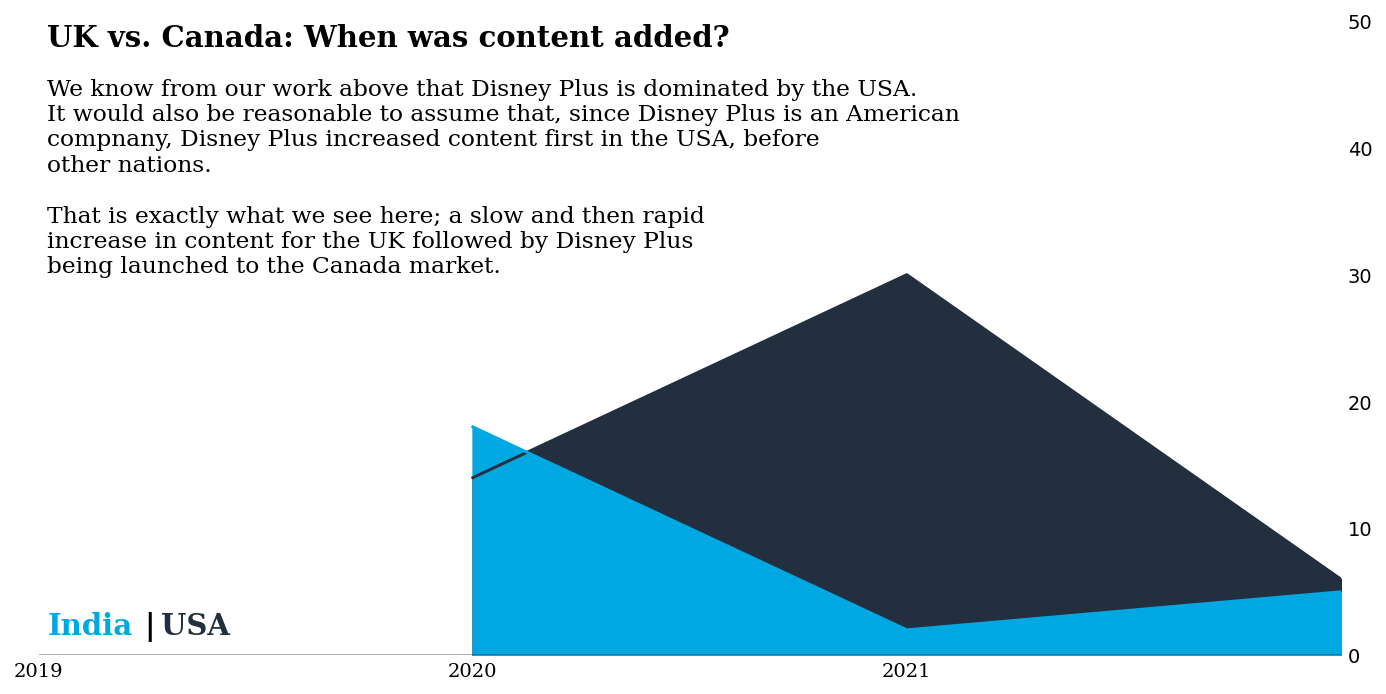

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#232F3E', '#00A8E1','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    #ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    

ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2018,2021)
plt.xticks(np.arange(2018, 2021, 1))

fig.text(0.13, 0.85, 'UK vs. Canada: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''
We know from our work above that Disney Plus is dominated by the USA.
It would also be reasonable to assume that, since Disney Plus is an American
compnany, Disney Plus increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the UK followed by Disney Plus 
being launched to the Canada market.'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [43]:
us_ind = df[(df['first_country'] == 'UK') | (df['first_country'] == 'Canada' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['UK','Canada']].cumsum(axis=0).T
data_sub.insert(0, "base", np.zeros(len(data_sub)))

data_sub = data_sub.add(-us_ind['year_added'].value_counts()/2, axis=0)


So the USA dominates. But is there a plot that can convey this in another way?

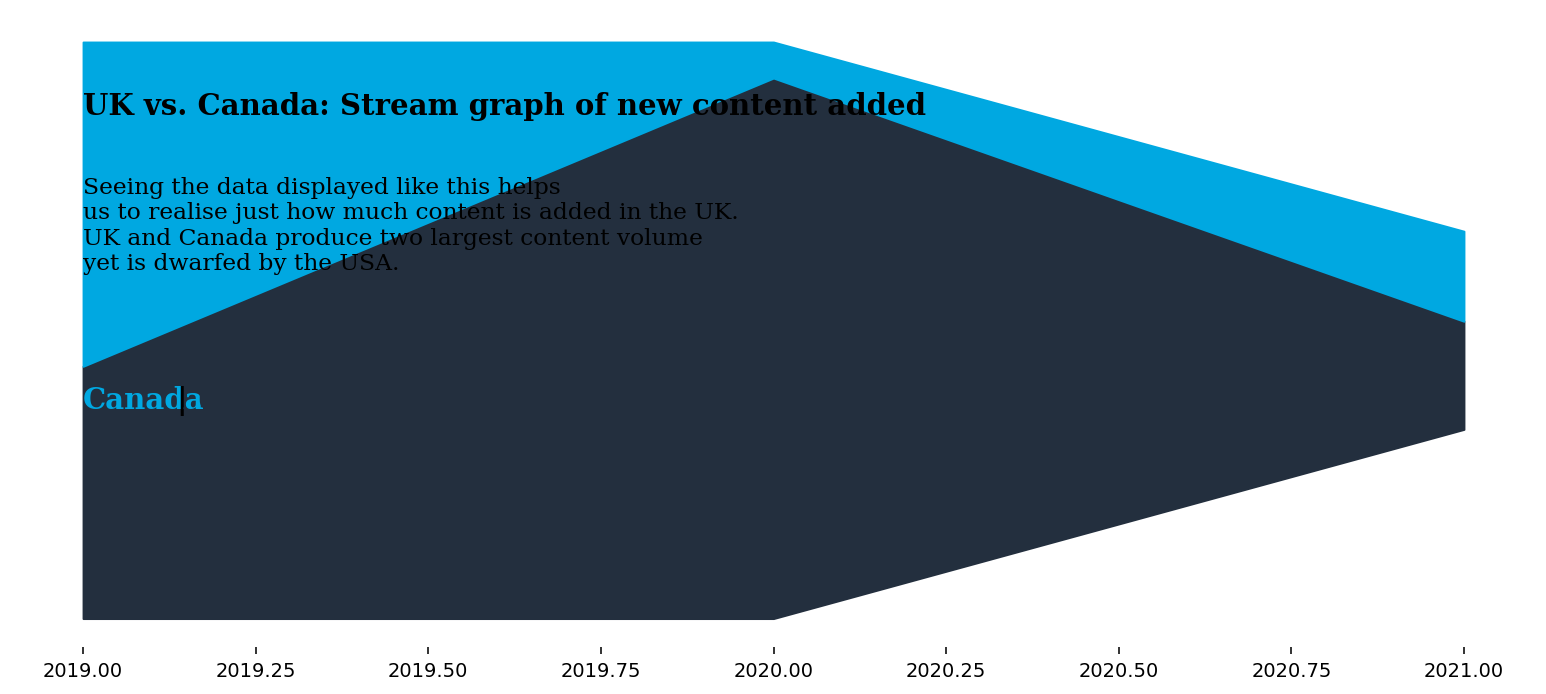

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
color = ['#00A8E1','#232F3E'][::-1]
hs_list = data_sub.columns
hs_built = data_sub[hs]

for i, hs in enumerate(hs_list):
    if i == 0 : continue
    ax.fill_between(hs_built.index, data_sub.iloc[:,i-1], data_sub.iloc[:,i], color=color[i-1])
    
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks([])
#ax.legend(loc='upper left')
ax.grid(False)

fig.text(0.16, 0.76, 'UK vs. Canada: Stream graph of new content added', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.575, 
'''
Seeing the data displayed like this helps 
us to realise just how much content is added in the UK.
UK and Canada produce two largest content volume
yet is dwarfed by the USA.'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.16,0.41,"Canada", fontweight="bold", fontfamily='serif', fontsize=15, color='#00A8E1')
fig.text(0.208,0.41,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.218,0.41,"UK", fontweight="bold", fontfamily='serif', fontsize=15, color='#232F3E')


ax.tick_params(axis=u'y', which=u'both',length=0)

plt.show()

# Lastly, we can view a wordcloud to get an overview of Disney Plus titles, descriptions and Directors


It is interesting to note that many films share the same key words in their titles.



Credit to Dmitry Uarov for figuring this visual out. His notebook is here:

https://www.kaggle.com/dmitryuarov/Disney Plus-eda-with-plotly



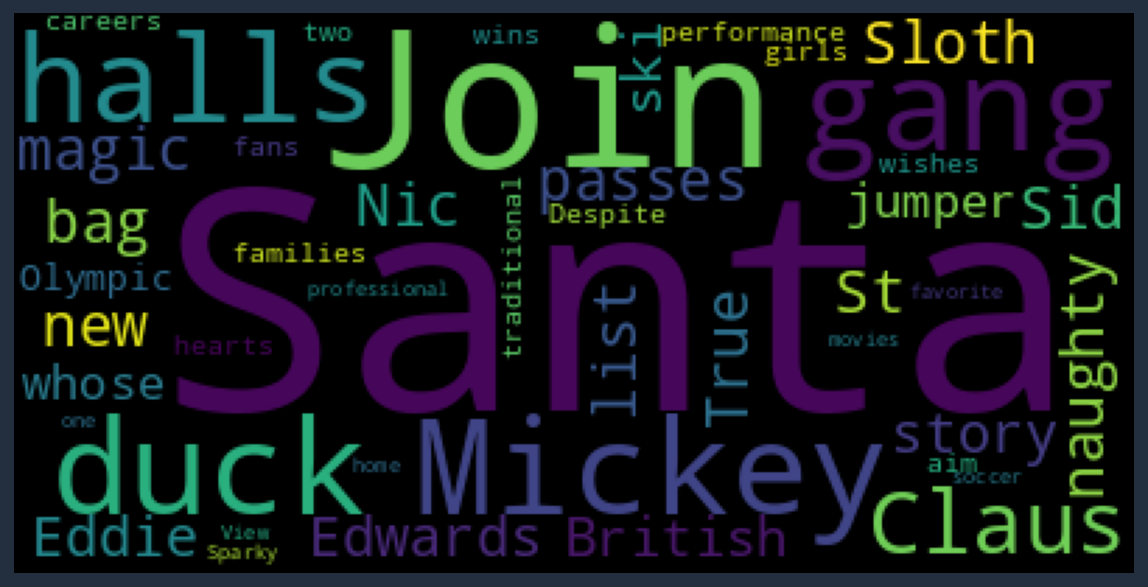

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in df.description: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '
    

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='#00A8E1', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 


text = df['description'].values 

wordcloud = WordCloud().generate(str(text))


# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#232F3E') 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [46]:
def create_wordcloud(column_togen):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud, STOPWORDS
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    # iterate through the csv file 
    for val in column_togen: 
       # typecaste each val to string 
       val = str(val) 
       # split the value 
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    for words in tokens: 
        comment_words = comment_words + words + ' '
    

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='#00A8E1', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    
    text = column_togen.values 

    wordcloud = WordCloud().generate(str(text))

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = '#232F3E') 
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

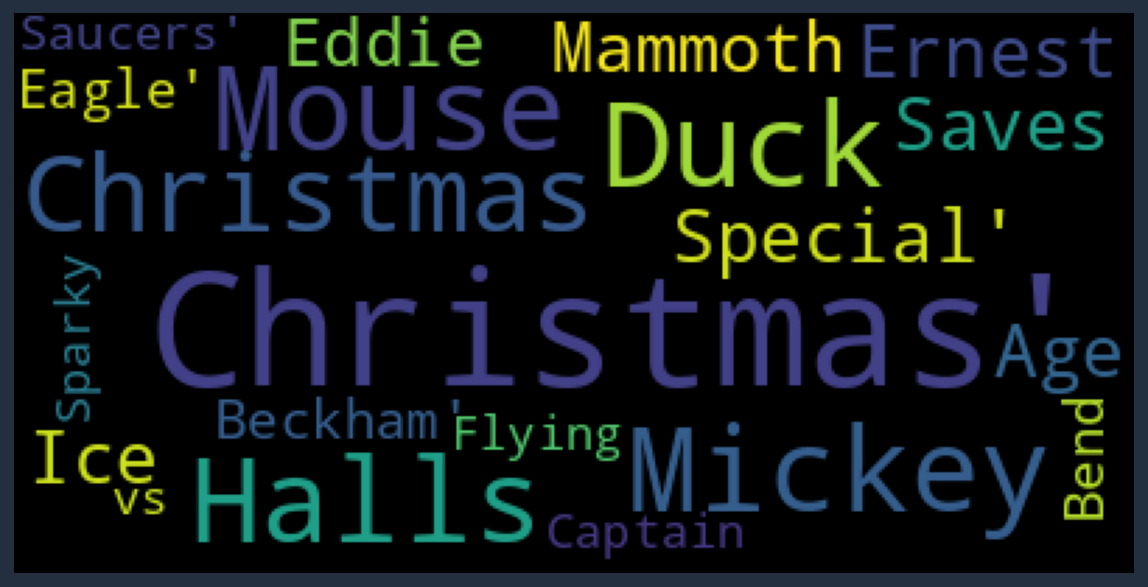

In [47]:
create_wordcloud(df.title)

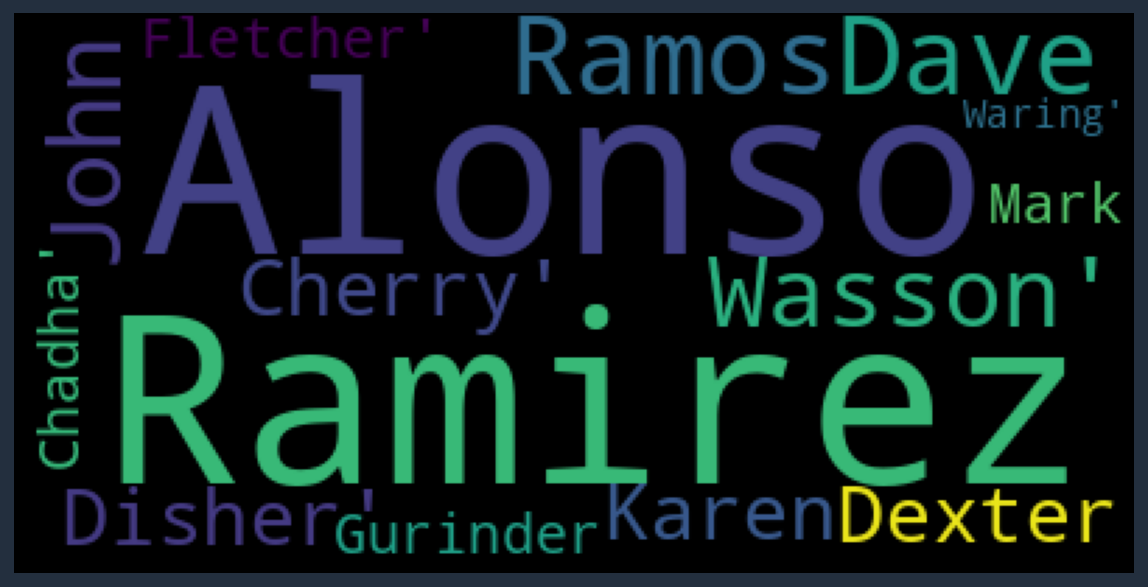

In [48]:
create_wordcloud(df.director)

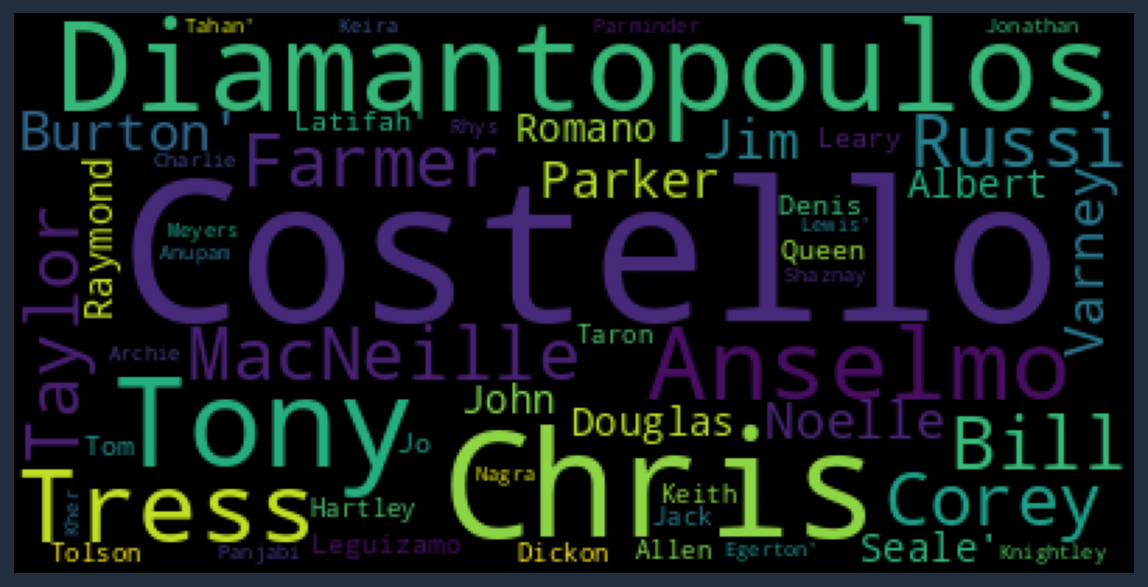

In [49]:
create_wordcloud(df.cast)

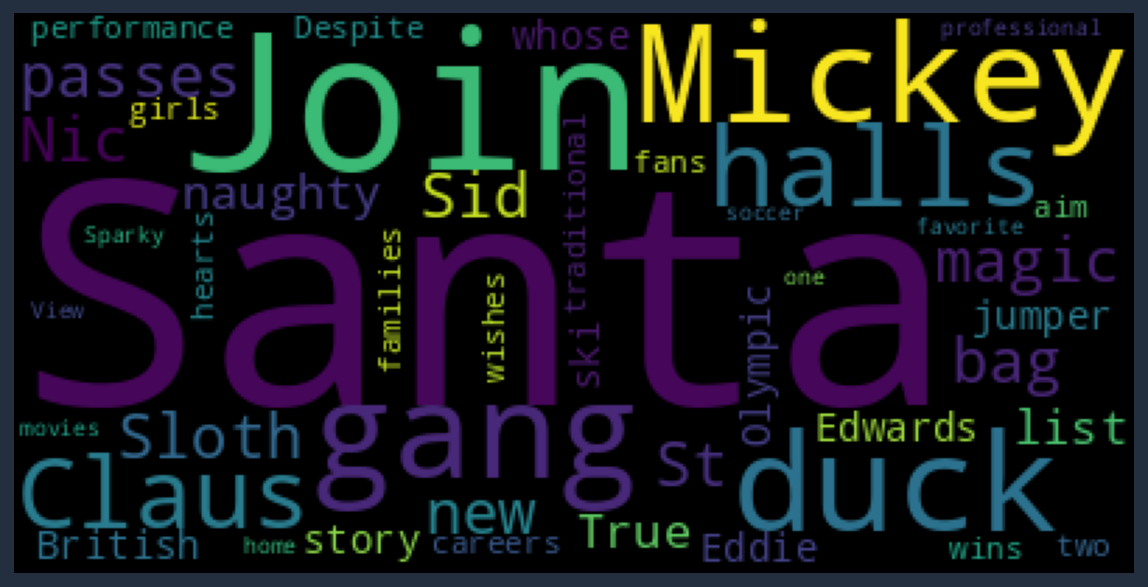

In [50]:
create_wordcloud(df.description)

In [51]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub = data_sub.reset_index()
print(data_sub.head(12))
print(data_sub.dtypes)

type      index  TV Show  Movie
0       January       23     61
1      February       18     44
2         March        9     22
3         April       25     86
4           May       30     62
5          June       22     52
6          July       35     85
7        August       21     50
8     September       31     59
9       October       22     63
10     November      144    808
11     December       13     52
type
index      category
TV Show       int64
Movie         int64
dtype: object


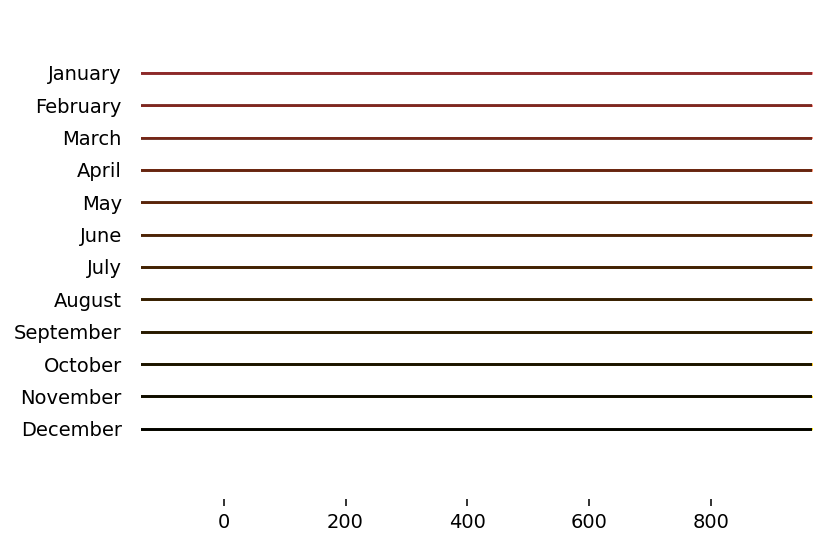

In [52]:
!pip install joypy
import pandas as pd
from joypy import joyplot

from matplotlib import cm

joyplot(data_sub, by = 'index', column = 'Movie', colormap=cm.autumn, fade = True)

plt.show()


## Work In Progress



[![work-progress-loading-bar-concept-hand-drawing-work-progress-loading-bar-concept-marker-transparent.jpg](https://i.postimg.cc/xTTQ0mKy/work-progress-loading-bar-concept-hand-drawing-work-progress-loading-bar-concept-marker-transparent.jpg)](https://postimg.cc/23JMGV9V)